In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import numpy as np

df = pd.read_csv("../../data/kion10y.csv", encoding="utf-8")
df

,年,月,日,気温,品質,均質
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
...,...,...,...,...,...,...
4013,2016,12,27,11.1,8,2
4014,2016,12,28,6.0,8,2
4015,2016,12,29,4.3,8,2
4016,2016,12,30,6.0,8,2


In [2]:
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6

In [3]:
def make_data(data):
    x = []
    y = []
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

In [4]:
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])
# print(train_x, train_y, test_x, test_y)

In [5]:
lr = LR(normalize=True)
lr.fit(train_x, train_y)
pre_y = lr.predict(test_x)

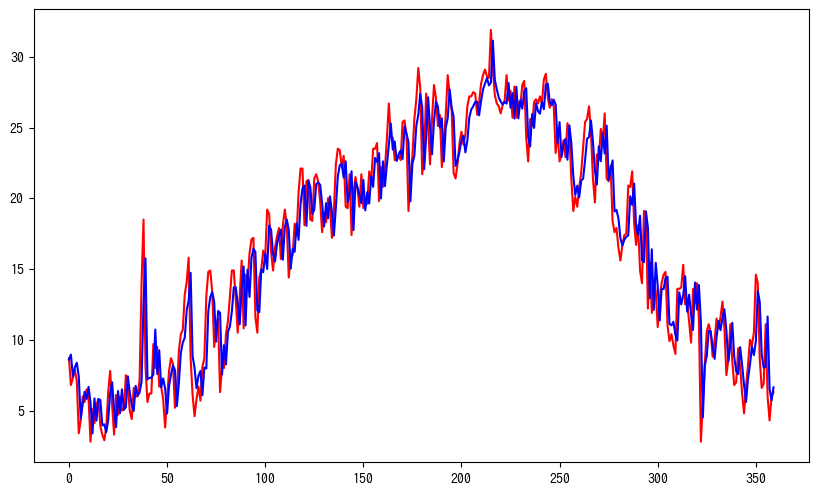

In [6]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c="r")
plt.plot(pre_y, c="b")
plt.savefig("../../images/tenki-kion-lr.png")
plt.show()

In [7]:
diff_y = abs(pre_y - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max=", max(diff_y))

average= 1.6640684971954243
max= 8.471949619908472
